# __Model evaluation by cross validation__

This example shows a basic use case when developing Machine Learning models, the estimation of the generalization capacity of the model. This example uses the toy Wine dataset to perform the tests. It is a super simple dataset but for purposes of showing the basic operation of the module it serves its purpose.


__Why cross-validation?__

Cross-validation is crucial in evaluating machine learning models because it provides a more reliable estimate of the model's performance. Here's a brief explanation:

1. Robust Performance Evaluation: Cross-validation involves splitting the dataset into multiple subsets and training the model multiple times, each time using a different subset as the validation set. This ensures that the model is tested on various data points, leading to a more accurate assessment of its generalization ability.

2. Reduced Overfitting: By evaluating the model on different splits of the data, cross-validation helps detect overfitting. A model that performs well on one particular split but poorly on others is likely overfitting to the training data.

3. Better Use of Data: Cross-validation makes efficient use of the available data, especially in cases where the dataset is limited. By rotating the training and validation sets, it ensures that every data point is used for both training and validation, providing a comprehensive evaluation.

4. Model Selection: It aids in model selection and hyperparameter tuning. By comparing performance across different models or hyperparameter settings using cross-validation, one can choose the best-performing model or configuration with greater confidence.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# for a simpler use, we load the different submodules of the library
#     - the gojo.core module contains all the subroutines used to evaluate the models
#     - the gojo.interfaces module provides a standardized way to interact with the different elements of gojo.core
#     - the gojo.util module implements some utilities
from gojo import core
from gojo import interfaces
from gojo import util


C:\Users\fgarcia\anaconda3\envs\mlv0\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The Wine dataset is a classic dataset used in machine learning for classification tasks. It contains data on various chemical properties of wines derived from three different cultivars of grapes. Here is a brief description of the typical Wine dataset:

__Purpose__: The Wine dataset is primarily used for classification tasks, where the goal is to predict the class of wine (cultivar) based on its chemical properties.

__Features__: The dataset includes 13 continuous features, which are:

- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

__Target Variable__: The target variable is the class label, which indicates the cultivar of the wine. There are three classes:

- Class 1
- Class 2
- Class 3

__Sample Size__: The dataset consists of 178 instances.

__Source__: The dataset was created by M. Forina, et al. and is often referenced in the UCI Machine Learning Repository.

In [2]:
# load test dataset (Wine)
wine_dt = datasets.load_wine()

# create the target variable. Classification problem 0 vs rest
# to see the target names you can use wine_dt['target_names']
y = (wine_dt['target'] == 1).astype(int)  
X = wine_dt['data']

X.shape, y.shape

((178, 13), (178,))

## __Definition and evaluation of a Support Vector Machine (SVM) model__

In this case we will go naive to define a model based on support vector machines (SVM) using a polynomial kernel in a straightforward way (without any data processing).

### __Understanding SVMs with Polynomial Kernels__

> __This introduction to SVMs can be skipped__


#### __Introduction to SVM__

Support Vector Machines are a powerful set of supervised learning algorithms used for classification and regression tasks. The core idea behind SVMs is to find a hyperplane that best separates the data points of different classes in a high-dimensional space.

#### __The Mathematical Foundation - Hyperplane__

In a binary classification problem, an SVM aims to find the optimal hyperplane that separates the data points into two classes. A hyperplane in an \(n\)-dimensional space is defined by the equation:

$$ \mathbf{w} \cdot \mathbf{x} + b = 0  $$

where:
- $\mathbf{w}$ is the weight vector perpendicular to the hyperplane.
- $\mathbf{x}$ is the feature vector.
- $b$ is the bias term.

#### __The Mathematical Foundation - Maximizing the Margin__

The objective of an SVM is to maximize the margin, which is the distance between the hyperplane and the nearest data points from each class. These nearest points are called support vectors. The margin $M$ is given by:

$$ M = \frac{2}{\|\mathbf{w}\|} $$

Maximizing the margin is equivalent to minimizing $ \|\mathbf{w}\|^2 $, subject to the constraint that all data points are correctly classified:

$$ y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 $$

for all $i$, where $ y_i $ is the class label of $ \mathbf{x}_i $.

#### __The Mathematical Foundation - The Optimization Problem__

This leads to the following optimization problem:

Minimize:
$$ \frac{1}{2} \|\mathbf{w}\|^2 $$

Subject to:
$$ y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 $$

#### __The Mathematical Foundation - Introducing Kernels__

In many cases, the data is not linearly separable in the original feature space. SVMs address this by using kernel functions to map the data into a higher-dimensional space where it becomes linearly separable. One common kernel is the polynomial kernel.

- Polynomial Kernel

The polynomial kernel allows the SVM to fit non-linear decision boundaries. It is defined as:

$$ K(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i \cdot \mathbf{x}_j + c)^d $$

where:
- $(\mathbf{x}_i \cdot \mathbf{x}_j)$ is the dot product of the input vectors.
- $ c $ is a constant that trades off the influence of higher-order versus lower-order terms.
- $ d $ is the degree of the polynomial.

- How It Works

1. **Mapping to Higher Dimensions**: The polynomial kernel maps the input features into a higher-dimensional space without explicitly computing the coordinates in that space. This is computationally efficient and allows the SVM to find complex decision boundaries.
   
2. **Dual Formulation**: The SVM problem can be solved in its dual form, where the optimization problem depends on the dot products of the input vectors. The polynomial kernel replaces these dot products, effectively transforming the problem into a higher-dimensional space.

- The Dual Optimization Problem

Using the polynomial kernel, the dual form of the optimization problem becomes:

Maximize:
$$ \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j K(\mathbf{x}_i, \mathbf{x}_j) $$

Subject to:
$$ \sum_{i=1}^{n} \alpha_i y_i = 0 $$
$$ 0 \leq \alpha_i \leq C $$

where \( \alpha_i \) are the Lagrange multipliers and \(C\) is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error.

Support Vector Machines with polynomial kernels are a powerful tool for classification tasks, especially when dealing with non-linear data. By transforming the input space into a higher-dimensional feature space, SVMs can find complex decision boundaries that separate the classes effectively. The polynomial kernel is particularly useful for capturing interactions between features up to a certain degree, making SVMs a versatile choice for many machine learning problems.


### __Hands-on__
In order for the sklearn SVM model to be used in gojo we can use the __SklearnModelWrapper__ interface.

This class simply needs to be provided with the class of a sklearn model (or any other class that is a subclass of __sklearn.base.BaseEstimator__), and then optional parameters used to initialize instances of the class provided in _model_class_.

> for more information use __help(interfaces.SklearnModelWrapper)__

In [3]:
model = interfaces.SklearnModelWrapper(
    model_class=SVC,
    kernel='poly', degree=1, coef0=0.0,
    cache_size=1000, class_weight=None
)
model

SklearnModelWrapper(
    base_model='sklearn.svm._classes.SVC',
    model_params={'kernel': 'poly', 'degree': 1, 'coef0': 0.0, 'cache_size': 1000, 'class_weight': None},
    predict_proba=False,
    supress_warnings=False
)

In [4]:
# to access a dictionary with the parameters provided to the model
model.getParameters()

{'kernel': 'poly',
 'degree': 1,
 'coef0': 0.0,
 'cache_size': 1000,
 'class_weight': None}

Let's try some inference without having trained the model yet.

In [5]:
try:
    model.performInference(X)
except Exception as ex:
    print(type(ex), ex)

<class 'gojo.exception.UnfittedEstimator'> Before making inferences through a model by calling the "performInferences()" method, it is necessary to adjust the model by calling the "train()" method.


In this case we get an exception indicating that before making inferences the model must be adjusted. To do this let's call the method train

In [6]:
model.train(X, y)
y_hat = model.performInference(X)

In [7]:
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1])

Now let's make a quick calculation of the model's accuracy

In [8]:
print('Accuracy: {:.2f}%'.format((y_hat == y).mean()*100))

Accuracy: 76.40%


If we want to reset the internal state of the model to forget previous settings we can use the __resetFit__ method

In [9]:
model.is_fitted

True

In [10]:
model.resetFit()  # reset previous model fits

In [11]:
model.is_fitted

False

We see that using a point-blank model without training and testing it on the same data we can expect an accuracy of 76.40%. Let us now try to evaluate it by cross-validation. For this we can use the function __core.evalCrossVal__

> for more information use __help(core.evalCrossVal)__

To evaluate the model we will load a cross validation object using the gojo utilities module, for example a 5-fold cross validation sklearn object with class stratification.

> for more information use __help(util.splitter.getCrossValObj)__

In [12]:
cv_obj = util.splitter.getCrossValObj(cv=5, repeats=1, stratified=True)
cv_obj

RepeatedStratifiedKFold(n_repeats=1, n_splits=5, random_state=None)

With the data, the model and a way to evaluate the model, a cross validation can now be performed.  The result of calling this function will be an object of type __gojo.core.CVReport__.

In [13]:
cv_report = core.evalCrossVal(
    X=X,
    y=y,
    model=model,
    cv=cv_obj,
)
cv_report

Performing cross-validation...: 5it [00:00, 987.96it/s]


The class __gojo.core.CVReport__ implements some interesting functionalities, let's see some of them directly using the code:

In [14]:
cv_report.getTestPredictions()  # access to all the predictions made on the test

pred_labels  true_labels
n_fold indices                          
0      9                  0            0
       13                 0            0
       17                 0            0
       20                 0            0
       21                 0            0
...                     ...          ...
4      153                0            0
       158                0            0
       159                1            0
       170                1            0
       172                0            0

[178 rows x 2 columns]

By passing it a list of metrics (for example those already defined in gojo.core.evaluation) we can directly obtain an evaluation of the model.

Note that this list of metrics are instances of the __gojo.core.Metrics__ class.

In [15]:
model_performance = cv_report.getScores(core.getDefaultMetrics('binary_classification'), supress_warnings=True)
model_performance

{'test':    accuracy  balanced_accuracy  precision    recall  sensitivity  specificity  \
 0  0.694444           0.685065   0.600000  0.642857     0.642857     0.727273   
 1  0.750000           0.730519   0.692308  0.642857     0.642857     0.818182   
 2  0.805556           0.804762   0.750000  0.800000     0.800000     0.809524   
 3  0.828571           0.833333   0.750000  0.857143     0.857143     0.809524   
 4  0.742857           0.738095   0.666667  0.714286     0.714286     0.761905   
 
    negative_predictive_value  f1_score       auc  n_fold  
 0                   0.761905  0.620690  0.685065       0  
 1                   0.782609  0.666667  0.730519       1  
 2                   0.850000  0.774194  0.804762       2  
 3                   0.894737  0.800000  0.833333       3  
 4                   0.800000  0.689655  0.738095       4  ,
 'train': None}

We see that this returns a dictionary of dataframes. In this case the dictionary only has one key which is test.

In [16]:
model_performance['test']

,accuracy,balanced_accuracy,precision,recall,sensitivity,specificity,negative_predictive_value,f1_score,auc,n_fold
0,0.694444,0.685065,0.600000,0.642857,0.642857,0.727273,0.761905,0.620690,0.685065,0
1,0.750000,0.730519,0.692308,0.642857,0.642857,0.818182,0.782609,0.666667,0.730519,1
2,0.805556,0.804762,0.750000,0.800000,0.800000,0.809524,0.850000,0.774194,0.804762,2
3,0.828571,0.833333,0.750000,0.857143,0.857143,0.809524,0.894737,0.800000,0.833333,3
4,0.742857,0.738095,0.666667,0.714286,0.714286,0.761905,0.800000,0.689655,0.738095,4


From here it is easy to calculate the average cross-validation performance. Let's format the result a bit...

In [17]:
pd.DataFrame(model_performance['test'].mean(), columns=['Performance']).drop(index=['n_fold']).round(decimals=3)

,Performance
accuracy,0.764
balanced_accuracy,0.758
precision,0.692
recall,0.731
sensitivity,0.731
specificity,0.785
negative_predictive_value,0.818
f1_score,0.710
auc,0.758


Let's see which metrics are implemented...

In [18]:
core.getAvailableDefaultMetrics()

{'binary_classification': ['accuracy',
  'balanced_accuracy',
  'precision',
  'recall',
  'sensitivity',
  'specificity',
  'npv',
  'f1_score',
  'auc'],
 'regression': ['explained_variance',
  'mse',
  'mae',
  'r2_score',
  'pearson_correlation']}

In [19]:
core.getDefaultMetrics('binary_classification')[:2]

[Metric(
     name=accuracy,
     function_kw={},
     multiclass=False
 ),
 Metric(
     name=balanced_accuracy,
     function_kw={},
     multiclass=False
 )]

In [20]:
core.getDefaultMetrics('regression')[:2]

[Metric(
     name=explained_variance,
     function_kw={},
     multiclass=False
 ),
 Metric(
     name=mse,
     function_kw={},
     multiclass=False
 )]

Now, what if I also want to access the training predictions? By default the predictions on the data used for training are not calculated. The rationale of this is to avoid unnecessary calculations when they are not required. However, we can specify that we want to apply the model on the training data used in each fold of the cross validation and save the results of the predictions by calling __core.evalCrossVal__ via __save_train_preds=True__.

Similarly, it is also possible to keep a copy of all the models trained in each of the folds by means of the parameter __save_models__ (by default this parameter is False).

> Here it should be noted that keeping a copy of the models implies a higher memory usage (similar to keeping a copy of the predictions on the training set).

In [21]:
cv_report_2 = core.evalCrossVal(
    X=X,
    y=y,
    model=model,
    cv=cv_obj,
    save_train_preds=True,
    save_models=True
)
cv_report_2

Performing cross-validation...: 5it [00:00, 822.77it/s]


In [22]:
cv_report_2.getTrainPredictions()  # access to all the predictions made on the train

pred_labels  true_labels
n_fold indices                          
0      0                  0            0
       1                  0            0
       2                  0            0
       3                  0            0
       4                  0            0
...                     ...          ...
4      171                1            0
       174                0            0
       175                0            0
       176                0            0
       177                1            0

[712 rows x 2 columns]

In [23]:
cv_report_2.getTrainedModels()   # It is also easy to access each of the models trained in each of the folds

{0: SklearnModelWrapper(
     base_model='sklearn.svm._classes.SVC',
     model_params={'kernel': 'poly', 'degree': 1, 'coef0': 0.0, 'cache_size': 1000, 'class_weight': None},
     predict_proba=False,
     supress_warnings=False
 ),
 1: SklearnModelWrapper(
     base_model='sklearn.svm._classes.SVC',
     model_params={'kernel': 'poly', 'degree': 1, 'coef0': 0.0, 'cache_size': 1000, 'class_weight': None},
     predict_proba=False,
     supress_warnings=False
 ),
 2: SklearnModelWrapper(
     base_model='sklearn.svm._classes.SVC',
     model_params={'kernel': 'poly', 'degree': 1, 'coef0': 0.0, 'cache_size': 1000, 'class_weight': None},
     predict_proba=False,
     supress_warnings=False
 ),
 3: SklearnModelWrapper(
     base_model='sklearn.svm._classes.SVC',
     model_params={'kernel': 'poly', 'degree': 1, 'coef0': 0.0, 'cache_size': 1000, 'class_weight': None},
     predict_proba=False,
     supress_warnings=False
 ),
 4: SklearnModelWrapper(
     base_model='sklearn.svm._classes.S

We can now calculate the same metrics as before on the test data and the training data to see how the model behaves.

In [24]:
model_performance_2 = cv_report_2.getScores(core.getDefaultMetrics('binary_classification'), supress_warnings=True)
model_performance_2

{'test':    accuracy  balanced_accuracy  precision    recall  sensitivity  specificity  \
 0  0.805556           0.788961   0.769231  0.714286     0.714286     0.863636   
 1  0.666667           0.688312   0.550000  0.785714     0.785714     0.590909   
 2  0.777778           0.761905   0.769231  0.666667     0.666667     0.857143   
 3  0.857143           0.880952   0.736842  1.000000     1.000000     0.761905   
 4  0.771429           0.750000   0.750000  0.642857     0.642857     0.857143   
 
    negative_predictive_value  f1_score       auc  n_fold  
 0                   0.826087  0.740741  0.788961       0  
 1                   0.812500  0.647059  0.688312       1  
 2                   0.782609  0.714286  0.761905       2  
 3                   1.000000  0.848485  0.880952       3  
 4                   0.782609  0.692308  0.750000       4  ,
 'train':    accuracy  balanced_accuracy  precision    recall  sensitivity  specificity  \
 0  0.746479           0.742002   0.672131  0.

We see that the model behaves similarly in training and testing which is indicating that the model is not overfitting (__we will see later what is actually happening since the model performing poorly__).

In [25]:
pd.concat([
    pd.DataFrame(model_performance_2['test'].mean(), columns=['Performance (test)']).drop(index=['n_fold']).round(decimals=3),
    pd.DataFrame(model_performance_2['train'].mean(), columns=['Performance (train)']).drop(index=['n_fold']).round(decimals=3)

], axis=1)


,Performance (test),Performance (train)
accuracy,0.776,0.765
balanced_accuracy,0.774,0.763
precision,0.715,0.689
recall,0.762,0.750
sensitivity,0.762,0.750
specificity,0.786,0.776
negative_predictive_value,0.841,0.824
f1_score,0.729,0.718
auc,0.774,0.763


Furthremore, let's take advantage of the fact that we have saved the models to take a look at the different support vectors.

In [26]:
# First, let's make a two-dimensional projection of the data to facilitate visualization.
tsne_projection = TSNE(n_components=2, perplexity=20, random_state=2024).fit_transform(X)
tsne_projection = pd.DataFrame(tsne_projection, columns=['emb_1', 'emb_2'])

In [27]:
trained_models = cv_report_2.getTrainedModels()

In [28]:
trained_models[0].model.support_

array([  4,  15,  16,  18,  31,  32,  34, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 141,  46,  47,  48,  49,  50,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  62,  63,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  77,  78,  79,  81,  82,  83,  85,  86,  88,
        89,  90,  91,  93,  94,  96,  97, 102])

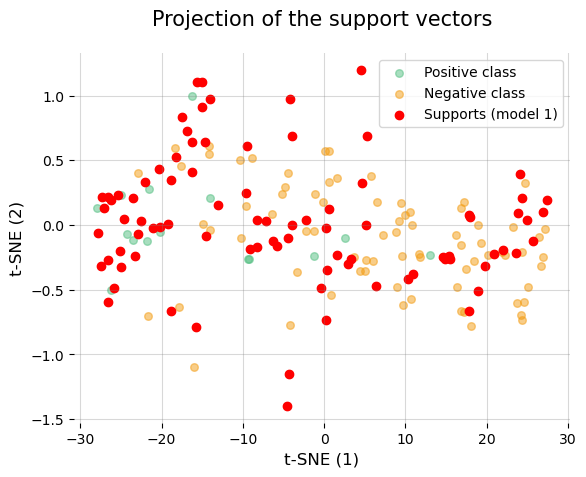

In [29]:
fig, ax = plt.subplots()

ax.scatter(
    tsne_projection.loc[y == 1]['emb_1'].values,
    tsne_projection.loc[y == 1]['emb_2'].values,
    color='#52BE80',
    label='Positive class',
    alpha=0.5, s=30
)

ax.scatter(
    tsne_projection.loc[y == 0]['emb_1'].values,
    tsne_projection.loc[y == 0]['emb_2'].values,
    color='#F39C12',
    label='Negative class',
    alpha=0.5, s=30
)

# access to the support vectors of the first model
ax.scatter(
    tsne_projection.iloc[trained_models[0].model.support_]['emb_1'].values,
    tsne_projection.iloc[trained_models[0].model.support_]['emb_2'].values,
    color='red',
    label='Supports (model 1)',
)

for pos in ['top', 'right', 'left', 'bottom']:
    ax.spines[pos].set_visible(False)
    
ax.grid(alpha=0.3, color='grey')
ax.set_ylabel('t-SNE (2)', size=12)
ax.set_xlabel('t-SNE (1)', size=12)
ax.set_title('Projection of the support vectors', size=15, pad=20)
ax.legend()
plt.show()


No doubt something strange is going on with the data... what could it be? __THAT WE HAVE FORGOTTEN TO STANDARDIZE THEM!!!__

To standardize the data during cross validation using the statistics of the training data to prevent any data leakage we can make use of the __interfaces.SKLearnTransformWrapper__ interface. Let us now look at the above example by standardizing the data to z-scores based on the training statistics.

> __Note__: any type of transformation can be implemented through the __interfaces.Transform__ or __interfaces.SKLearnTransformWrapper__ interfaces (e.g. a feature selection or any other type of transformation).

In [30]:
zscores_scaler = interfaces.SKLearnTransformWrapper(transform_class=StandardScaler)
zscores_scaler

SKLearnTransformWrapper(
    base_transform='sklearn.preprocessing._data.StandardScaler',
    transform_params={}
)

In [31]:
cv_report_3 = core.evalCrossVal(
    X=X,
    y=y,
    model=model,
    cv=cv_obj,
    save_train_preds=True,
    save_models=True,
    transforms=[zscores_scaler]     # we can provide he transforms using the `transform` parameter
)
cv_report_3

Performing cross-validation...: 5it [00:00, 830.52it/s]


Let's recalculate the performance as before...

In [32]:
model_performance_3 = cv_report_3.getScores(core.getDefaultMetrics('binary_classification'), supress_warnings=True)
pd.concat([
    pd.DataFrame(model_performance_3['test'].mean(), columns=['Performance (test)']).drop(index=['n_fold']).round(decimals=3),
    pd.DataFrame(model_performance_3['train'].mean(), columns=['Performance (train)']).drop(index=['n_fold']).round(decimals=3)

], axis=1)


,Performance (test),Performance (train)
accuracy,0.983,0.987
balanced_accuracy,0.981,0.984
precision,0.985,1.000
recall,0.971,0.968
sensitivity,0.971,0.968
specificity,0.991,1.000
negative_predictive_value,0.983,0.980
f1_score,0.978,0.984
auc,0.981,0.984


As you can see now if we have a good performance, it is very important that for distance-based models such as SVMs we __standardize the data!!!__

Let's represent again the support vectors of the first model...

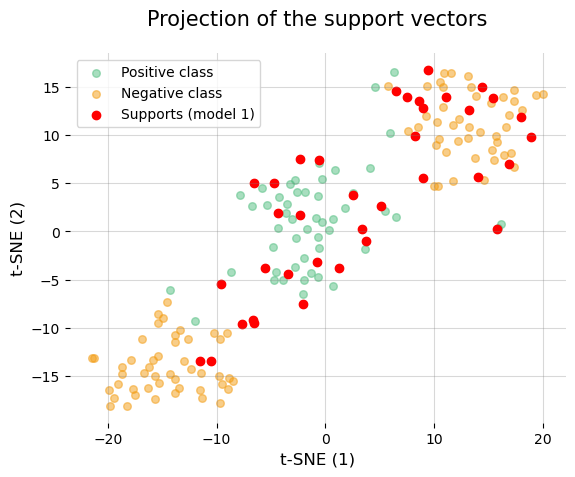

In [33]:
# access to trained models
trained_models = cv_report_3.getTrainedModels()

# standardization of all data to z-scores to recalculate the t-SNE projection
zscores_scaler.fit(X)
zscores_X = zscores_scaler.transform(X)
tsne_projection = TSNE(n_components=2, perplexity=20, random_state=2024).fit_transform(zscores_X)
tsne_projection = pd.DataFrame(tsne_projection, columns=['emb_1', 'emb_2'])

fig, ax = plt.subplots()

ax.scatter(
    tsne_projection.loc[y == 1]['emb_1'].values,
    tsne_projection.loc[y == 1]['emb_2'].values,
    color='#52BE80',
    label='Positive class',
    alpha=0.5, s=30
)

ax.scatter(
    tsne_projection.loc[y == 0]['emb_1'].values,
    tsne_projection.loc[y == 0]['emb_2'].values,
    color='#F39C12',
    label='Negative class',
    alpha=0.5, s=30
)

# access to the support vectors of the first model
ax.scatter(
    tsne_projection.iloc[trained_models[0].model.support_]['emb_1'].values,
    tsne_projection.iloc[trained_models[0].model.support_]['emb_2'].values,
    color='red',
    label='Supports (model 1)',
)

for pos in ['top', 'right', 'left', 'bottom']:
    ax.spines[pos].set_visible(False)
    
ax.grid(alpha=0.3, color='grey')
ax.set_ylabel('t-SNE (2)', size=12)
ax.set_xlabel('t-SNE (1)', size=12)
ax.set_title('Projection of the support vectors', size=15, pad=20)
ax.legend()
plt.show()


__We have now been able to see that the support vectors make much more sense than before, and there are also fewer of them, which is a sign that the model is not overfitting.__
